In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

In [2]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [3]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [5]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [6]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [7]:
corpus = create_lyrics_corpus(dataset,'text')
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

<ipython-input-3-2f3d538caa2f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')


In [8]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [9]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [10]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [11]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

Epoch 1/200
62/62 [==============================] - 16s 89ms/step - loss: 5.9966 - accuracy: 0.0358
Epoch 2/200
62/62 [==============================] - 3s 42ms/step - loss: 5.4440 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 1s 22ms/step - loss: 5.3714 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 1s 10ms/step - loss: 5.3183 - accuracy: 0.0399
Epoch 5/200
62/62 [==============================] - 0s 7ms/step - loss: 5.2492 - accuracy: 0.0394
Epoch 6/200
62/62 [==============================] - 0s 7ms/step - loss: 5.1810 - accuracy: 0.0394
Epoch 7/200
62/62 [==============================] - 1s 10ms/step - loss: 5.1142 - accuracy: 0.0388
Epoch 8/200
62/62 [==============================] - 0s 7ms/step - loss: 5.0504 - accuracy: 0.0424
Epoch 9/200
62/62 [==============================] - 0s 7ms/step - loss: 4.9775 - accuracy: 0.0520
Epoch 10/200
62/62 [==============================] - 0s 7ms/step - loss: 4.9013 - accuracy: 0.0520
Epo

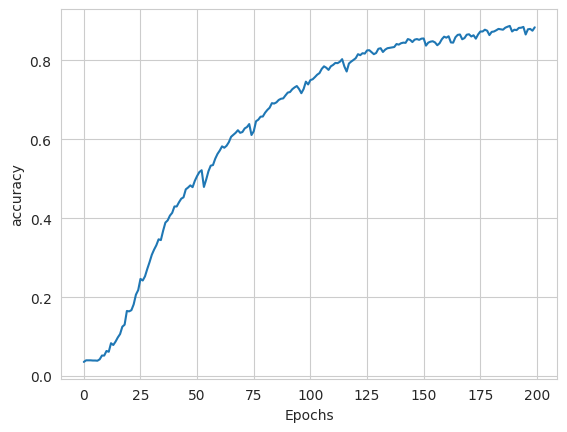

In [13]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graphs(history,'accuracy')

In [14]:

seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],p=predicted_probs)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
i m feeling chills it as dreams you more you oh what dreams care girl shining above you feel feet kind as care slow once girl above as girl above as girl moving will tomorrow tomorrow tomorrow true true tomorrow true true above above as a felt true emptiness fine give yourself baby feel darkest baby body just misunderstood think ive give ma near us cry good my would weave couldnt hand house can am again sound what song feel baby lousy hour please front shame to secrets break standing scars scars velvet feel truth just hand sky start past fool deny eye slow
